In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sns

df=pd.read_csv('glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
jumlah_dataset = df.shape[0]
print("Jumlah dataset:", jumlah_dataset)

Jumlah dataset: 214


In [ ]:
print(df.dtypes)
df.describe()

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
bins=np.linspace(min(df['Type']), max(df['Type']),8)
group_names=['type1','type2','type3','type4','type5','type6','type7']
df['Type_binned']=pd.cut(df['Type'], bins, labels=group_names, include_lowest=True)
df['Type_binned'].value_counts()

type2    76
type1    70
type7    29
type3    17
type5    13
type6     9
type4     0
Name: Type_binned, dtype: int64

Text(0.5, 0, 'Glass type number')

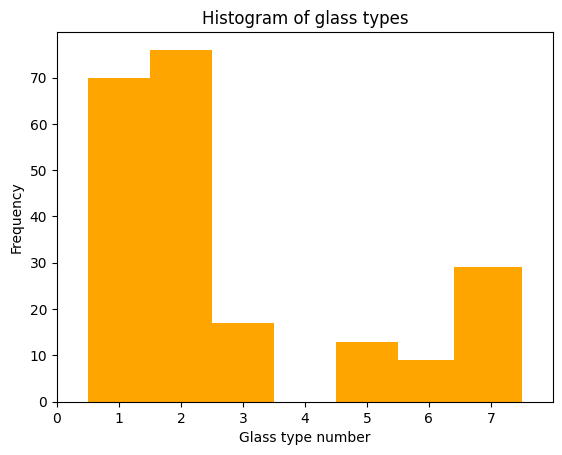

In [ ]:
counts = np.bincount(df['Type'])
ax = df['Type'].plot(kind='hist', color='orange')
ax.bar(range(0, 8), counts, width=1, align='center', color='orange')
ax.set(xticks=range(0, 8), xlim=(0, 8))
ax.set_title('Histogram of glass types')
ax.set_ylabel('Frequency')
ax.set_xlabel('Glass type number')


In [ ]:
#We will check for correlation between different parameters
df.drop(['Type_binned'], axis=1).corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


From the matrix we can see that the constituents of glass that are most correlated with the type are:  Na, Mg, Al, Ba. To predict the type of glass, however, we will use classification algorithms.

Elements which are most correlated to RI, hence could be used to predict the RI of the glass, are: Al, Si, K, Ca. For this task we will use regression models.

In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
#Performing scaling of data and splitting into train and test sets
X=df.drop(['Type', 'Type_binned'], axis=1)
Y=df['Type']
x_train,x_test, y_train, y_test=train_test_split(X, Y, test_size=0.2, shuffle=True, stratify=Y, random_state=42)
scaler=preprocessing.StandardScaler().fit(x_train)
x_train=scaler.transform(x_train.astype(float))
x_test=scaler.transform(x_test.astype(float))
print("type counts in train set: \n", y_train.value_counts())
print("type counts in test set: \n", y_test.value_counts())

type counts in train set: 
 2    61
1    56
7    23
3    14
5    10
6     7
Name: Type, dtype: int64
type counts in test set: 
 2    15
1    14
7     6
5     3
3     3
6     2
Name: Type, dtype: int64


In [ ]:
#Defining plotting function for confusion matrix
def plot_cmatrix(y_test, y_hat):
    fig, ax = plt.subplots(figsize=(8, 5))
    labels=["Type 1","Type 2","Type 3","Type 5", "Type 6", "Type 7"]
    cmp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_hat),display_labels=labels,)
    cmp.plot(ax=ax)
    return plt.show();

For SVM :
SVC(C=1000.0, class_weight='balanced', decision_function_shape='ovo',
    gamma='auto')
              precision    recall  f1-score   support

           1       0.79      0.79      0.79        14
           2       0.85      0.73      0.79        15
           3       0.50      0.67      0.57         3
           5       1.00      1.00      1.00         3
           6       0.50      0.50      0.50         2
           7       0.86      1.00      0.92         6

    accuracy                           0.79        43
   macro avg       0.75      0.78      0.76        43
weighted avg       0.80      0.79      0.79        43



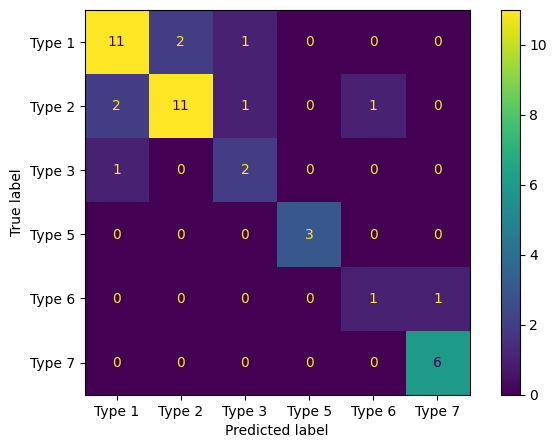

accuracy : 0.7906976744186046


In [ ]:
#Let's try SVM

parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':['scale', 'auto'],
             'class_weight':['balanced', None],
             'decision_function_shape':['ovo', 'ovr']}
svm = SVC()

cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
svm_cv=GridSearchCV(svm, parameters, cv=cv).fit(x_train, y_train)

y_hat=svm_cv.predict(x_test)
print("For SVM :")
print(svm_cv.best_estimator_)
print(classification_report(y_test, y_hat, zero_division=0))
plot_cmatrix(y_test, y_hat)
svm_cv_score=svm_cv.score(x_test, y_test)
print("accuracy :",svm_cv_score)

DecisionTreeClassifier:
              precision    recall  f1-score   support

           1       0.83      0.71      0.77        14
           2       0.77      0.67      0.71        15
           3       0.50      0.67      0.57         3
           5       0.67      0.67      0.67         3
           6       0.67      1.00      0.80         2
           7       0.75      1.00      0.86         6

    accuracy                           0.74        43
   macro avg       0.70      0.79      0.73        43
weighted avg       0.76      0.74      0.74        43



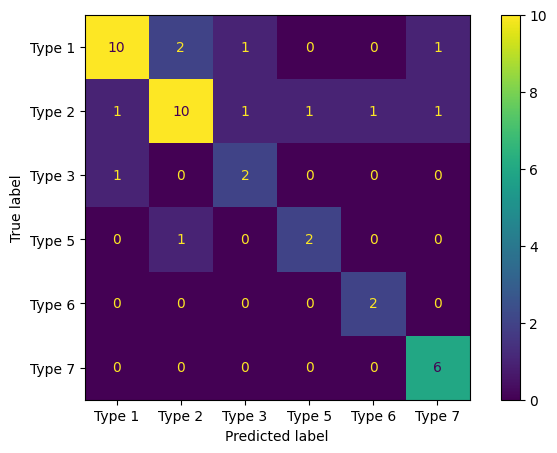

accuracy : 0.7441860465116279


In [ ]:
# Decision Tree Classifier:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_hat = model.predict(x_test)
print("DecisionTreeClassifier:")
print(classification_report(y_test, y_hat, zero_division=0))
plot_cmatrix(y_test, y_hat)
tree_score=model.score(x_test, y_test)
print("accuracy :",tree_score)

Random Forest Classifier:
              precision    recall  f1-score   support

           1       0.76      0.93      0.84        14
           2       0.85      0.73      0.79        15
           3       1.00      0.67      0.80         3
           5       1.00      0.67      0.80         3
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.84        43
   macro avg       0.88      0.83      0.84        43
weighted avg       0.85      0.84      0.84        43



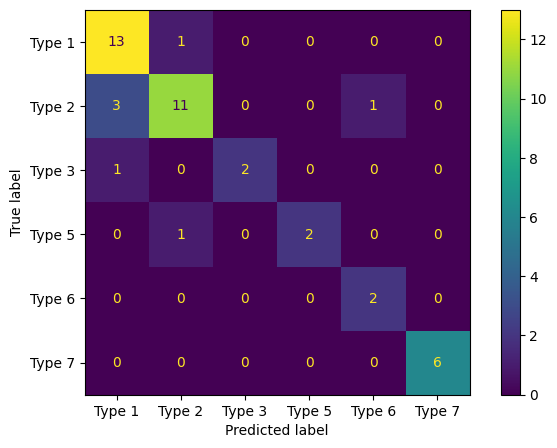

accuracy : 0.8372093023255814


In [ ]:
#Random Forest Tree

RFC = RandomForestClassifier(random_state=42)
RFC.fit(x_train, y_train)
y_hat = RFC.predict(x_test)
print("Random Forest Classifier:")
print(classification_report(y_test, y_hat, zero_division=0))
plot_cmatrix(y_test, y_hat)
RFC_score=RFC.score(x_test, y_test)
print("accuracy :",RFC_score)

GradientBoostingClassifier(subsample=0.3)
              precision    recall  f1-score   support

           1       0.75      0.86      0.80        14
           2       0.79      0.73      0.76        15
           3       0.50      0.33      0.40         3
           5       1.00      1.00      1.00         3
           6       0.50      0.50      0.50         2
           7       1.00      1.00      1.00         6

    accuracy                           0.79        43
   macro avg       0.76      0.74      0.74        43
weighted avg       0.79      0.79      0.79        43



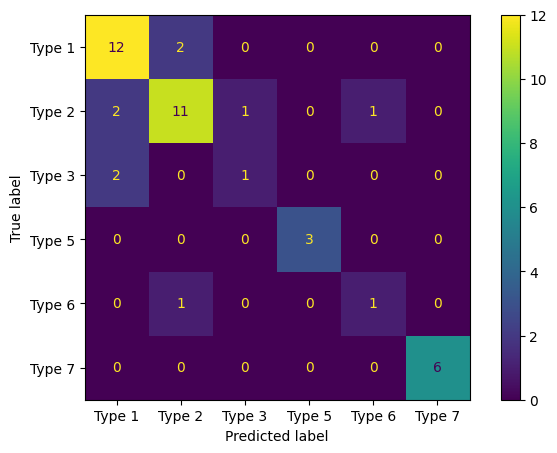

accuracy : 0.7906976744186046


In [ ]:
#Gradient Boosting Classifier with parameter tuning:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier()
parameters = {'n_estimators': [10, 20, 50, 70, 100],
              'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
              'subsample': [0.3, 0.5, 0.7, 1.0],
              'max_depth': [3, 5, 7]}
grad_cv = GridSearchCV(estimator=grad, param_grid=parameters, n_jobs=-1, cv=5).fit(x_train, y_train)
print(grad_cv.best_estimator_)
y_hat = grad_cv.predict(x_test)
print(classification_report(y_test, y_hat, zero_division=0))
plot_cmatrix(y_test, y_hat)
grad_score=grad_cv.score(x_test, y_test)
print("accuracy :",grad_score)

In [ ]:
#Accuracy of methods:
ser=pd.Series([grad_score, tree_score, RFC_score],
              index=["Gradient Boosting", "DecisionTree", "Random Forest"])
koef=pd.DataFrame(data=ser,
                  index=["Gradient Boosting", "DecisionTree", "Random Forest"],
                  columns=["Accuracy"])
koef.index.name='Method'
koef.reset_index(inplace=True)
koef

,Method,Accuracy
0,Gradient Boosting,0.790698
1,DecisionTree,0.744186
2,Random Forest,0.837209


From the accuracy score I would conclude that the best algorithm for glass classification is Random Forest Classifier.

Now, I would like to try to train a ML to predict the RI from the constituents of the glass.

In [ ]:
#RI prediction with splitting data into training and testing sets
features3=['Al', 'Si', 'K', 'Ca']
X=df[features3]
Y=df['RI']
x_train, x_test, y_train, y_test=train_test_split(X, Y, test_size=0.3, random_state=1)
lr=LinearRegression()
lr.fit(x_train, y_train)
yhat_train=lr.predict(x_train)
yhat_test=lr.predict(x_test)
print("R^2 value for linear regression using all parameters on training data:", lr.score(x_train, y_train))
print("R^2 value for linear regression using all parameters on test data:", lr.score(x_test, y_test))

R^2 value for linear regression using all parameters on training data: 0.8218063754522578
R^2 value for linear regression using all parameters on test data: 0.9057562211480199


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
features3=['Al', 'Si', 'K', 'Ca']
Input=[('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False, degree=2)), ('model', LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(df[features3], df['RI'])
print("R^2 value for pipeline approach using all parameters: ", pipe.score(df[features3], df['RI']))

R^2 value for pipeline approach using all parameters:  0.879111799458439


In [ ]:
#Let's split data into training and testing part and we will use RidgeRegression on data
from sklearn.linear_model import RidgeCV
X=df[features3]
Y=df['RI']
x_train, x_test, y_train, y_test=train_test_split(X, Y, test_size=0.3, random_state=1)
pf=PolynomialFeatures(degree=2)
x_train_pf=pf.fit_transform(x_train)
x_test_pf=pf.fit_transform(x_test)

ridge_cv = RidgeCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10, 100, 1000, 10000]).fit(x_train_pf, y_train)
print("The train score for ridge model is {}".format(ridge_cv.score(x_train_pf, y_train)))
print("The test score for ridge model is {}".format(ridge_cv.score(x_test_pf, y_test)))

The train score for ridge model is 0.835653330749689
The test score for ridge model is 0.8998032402699756


In [ ]:
from sklearn.linear_model import Ridge
parameters1=[{'alpha':[0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}]
RR=Ridge()
Grid1=GridSearchCV(RR, parameters1, cv=3)
Grid1.fit(df[features3], df['RI'])
print(Grid1.best_estimator_)
BestRR=Grid1.best_estimator_
print("R^2 value for Ridge regression with best alpha value: ", BestRR.score(df[features3], df['RI']))

Ridge(alpha=1)
R^2 value for Ridge regression with best alpha value:  0.8625282788597907


In [ ]:
features3=['Al', 'Si', 'K', 'Ca']
X=df[features3]
Y=df['RI']
lr=LinearRegression()
lr.fit(X, Y)
yhat=lr.predict(X)
print("R^2 value for linear regression :", lr.score(X, Y))

R^2 value for linear regression : 0.8625554738126803


R^2 value for multiple linear regression:  0.8625554738126803


[Text(0.5, 1.0, 'Residual plot: predicted value vs actual RI'),
 Text(0.5, 0, 'Predicted RI')]

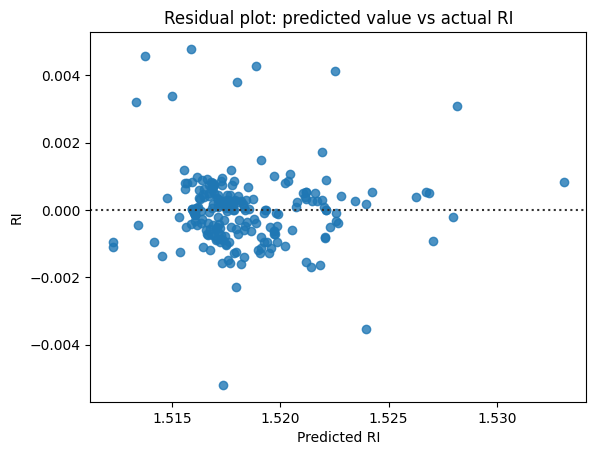

In [ ]:
#Let's try to visualize residual plot of multiple linear regression
z=df[['Al', 'Si', 'K', 'Ca']]
y=df['RI']
lr.fit(z, y)
yhat=lr.predict(z)
print("R^2 value for multiple linear regression: ", lr.score(z, df['RI']))
sns.residplot(x=yhat, y=df['RI']).set(title='Residual plot: predicted value vs actual RI', xlabel='Predicted RI')

In [ ]:
#Let's print out the determined coefficients:
print(lr.coef_)# coeffcients for Al, Si, K and Ca
print(lr.intercept_)

[-0.00128884 -0.00169019 -0.0004797   0.00135006]
1.6311677348502887


In [ ]:
#Now, we can try to use all parameters (except Type) to predict RI using linear regression:
features5=['Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba','Fe']
X=df[features5]
Y=df['RI']
x_train, x_test, y_train, y_test=train_test_split(X, Y, test_size=0.3, random_state=1)
lr=LinearRegression()
lr.fit(x_train, y_train)
yhat_train=lr.predict(x_train)
yhat_test=lr.predict(x_test)
print("R^2 value for linear regression using all parameters on training data:", lr.score(x_train, y_train))
print("R^2 value for linear regression using all parameters on test data:", lr.score(x_test, y_test))

R^2 value for linear regression using all parameters on training data: 0.8563440346882558
R^2 value for linear regression using all parameters on test data: 0.936653181447042


In [ ]:
print(lr.coef_)# coeffcients
print(lr.intercept_)

[0.00180953 0.00234255 0.0005671  0.00068576 0.00185936 0.00353944
 0.00346314 0.00044884]
1.403924822773967


[Text(0.5, 1.0, 'Residual plot: predicted value vs actual RI'),
 Text(0.5, 0, 'Predicted RI')]

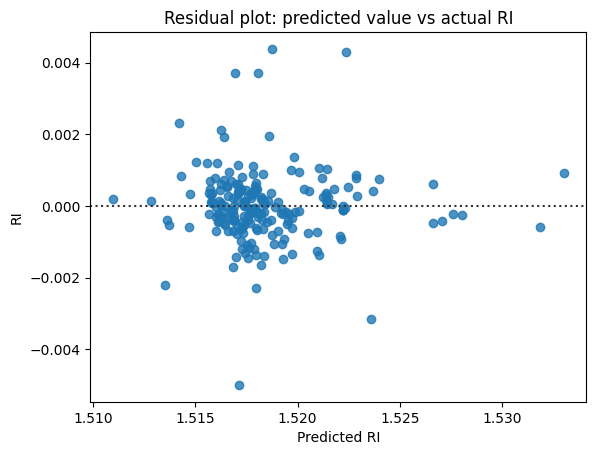

In [ ]:
z=df[features5]
y=df['RI']
lr.fit(z, y)
yhat=lr.predict(z)
sns.residplot(x=yhat, y=df['RI']).set(title='Residual plot: predicted value vs actual RI', xlabel='Predicted RI')

In [ ]:
parameters1=[{'alpha':[0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}]
RR=Ridge()
Grid2=GridSearchCV(RR, parameters1, cv=3)
Grid2.fit(x_train, y_train)
print(Grid2.best_estimator_)
BestRR=Grid2.best_estimator_
y_hat=BestRR.predict(x_test)
print("R^2 value for Ridge regression with best alpha value: ", BestRR.score(x_test, y_test))

Ridge(alpha=0.1)
R^2 value for Ridge regression with best alpha value:  0.9379943483109247


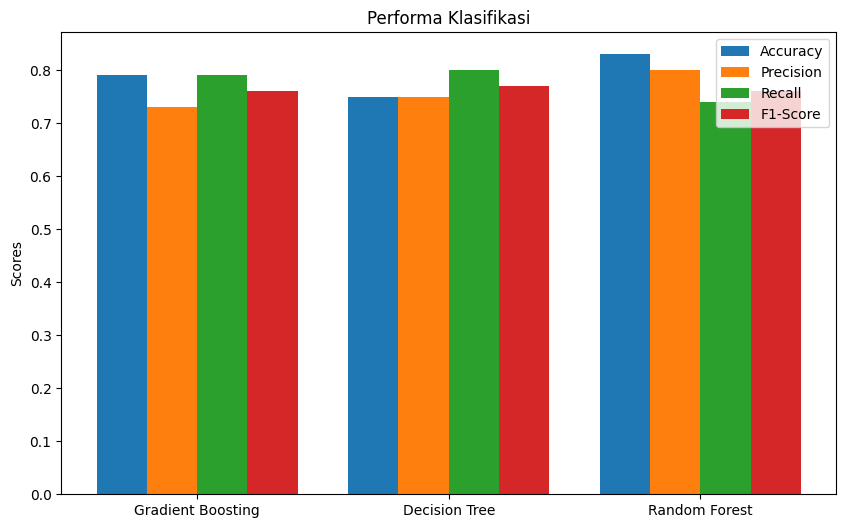

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data performa
accuracy = [0.79, 0.75, 0.83]
precision = [0.73, 0.75, 0.80]
recall = [0.79, 0.80, 0.74]
f1_score = [0.76, 0.77, 0.76]

# Nama metode klasifikasi
methods = ["Gradient Boosting", "Decision Tree", "Random Forest"]

# Mengatur posisi grup pada sumbu x
x = np.arange(len(methods))

# Lebar bar
bar_width = 0.2

# Membuat grafik
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - 1.5*bar_width, accuracy, bar_width, label='Accuracy')
bar2 = ax.bar(x - 0.5*bar_width, precision, bar_width, label='Precision')
bar3 = ax.bar(x + 0.5*bar_width, recall, bar_width, label='Recall')
bar4 = ax.bar(x + 1.5*bar_width, f1_score, bar_width, label='F1-Score')

# Label pada sumbu x
ax.set_xticks(x)
ax.set_xticklabels(methods)

# Menambahkan label pada sumbu y
ax.set_ylabel('Scores')

# Menambahkan judul
ax.set_title('Performa Klasifikasi')

# Menambahkan legenda
ax.legend()

# Menampilkan grafik
plt.show()


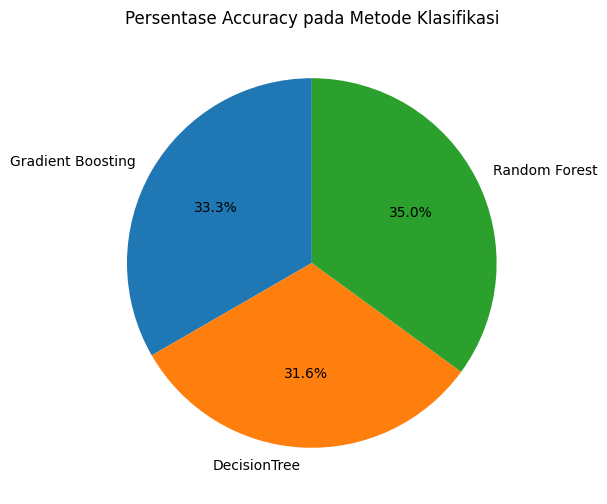

In [ ]:
import matplotlib.pyplot as plt

# Data performa
accuracy = [0.79, 0.75, 0.83]

# Nama metode klasifikasi
methods = ["Gradient Boosting", "DecisionTree", "Random Forest"]

# Membuat pie chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(accuracy, labels=methods, autopct='%1.1f%%', startangle=90)
ax.set_title('Persentase Accuracy pada Metode Klasifikasi')

# Menampilkan pie chart
plt.show()

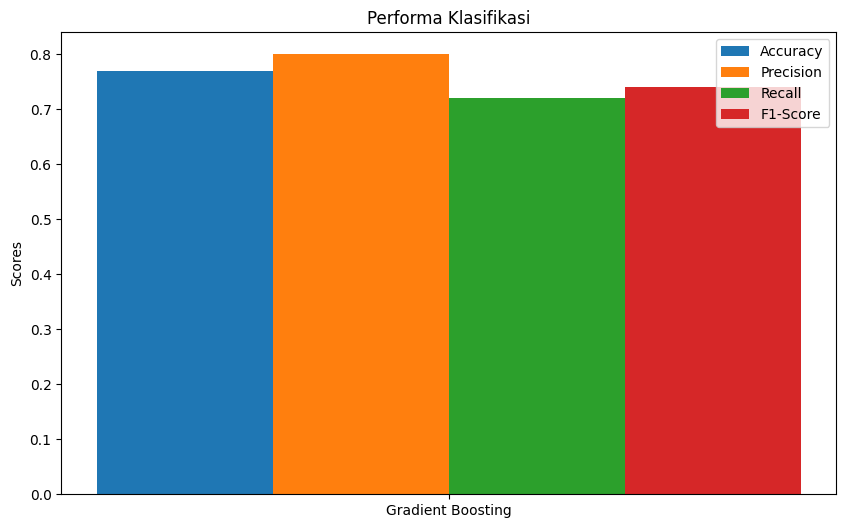

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data performa
accuracy = [0.77]
precision = [0.80]
recall = [0.72]
f1_score = [0.74]

# Nama metode klasifikasi
methods = ["Gradient Boosting"]

# Mengatur posisi grup pada sumbu x
x = np.arange(len(methods))

# Lebar bar
bar_width = 0.2

# Membuat grafik
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - 1.5*bar_width, accuracy, bar_width, label='Accuracy')
bar2 = ax.bar(x - 0.5*bar_width, precision, bar_width, label='Precision')
bar3 = ax.bar(x + 0.5*bar_width, recall, bar_width, label='Recall')
bar4 = ax.bar(x + 1.5*bar_width, f1_score, bar_width, label='F1-Score')

# Label pada sumbu x
ax.set_xticks(x)
ax.set_xticklabels(methods)

# Menambahkan label pada sumbu y
ax.set_ylabel('Scores')

# Menambahkan judul
ax.set_title('Performa Klasifikasi')

# Menambahkan legenda
ax.legend()

# Menampilkan grafik
plt.show()


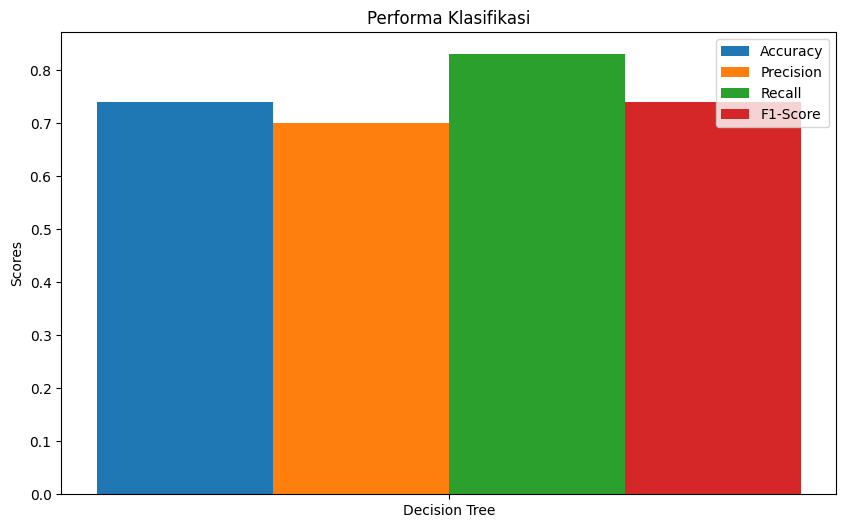

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data performa
accuracy = [0.74]
precision = [0.70]
recall = [0.83]
f1_score = [0.74]

# Nama metode klasifikasi
methods = ["Decision Tree"]

# Mengatur posisi grup pada sumbu x
x = np.arange(len(methods))

# Lebar bar
bar_width = 0.2

# Membuat grafik
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - 1.5*bar_width, accuracy, bar_width, label='Accuracy')
bar2 = ax.bar(x - 0.5*bar_width, precision, bar_width, label='Precision')
bar3 = ax.bar(x + 0.5*bar_width, recall, bar_width, label='Recall')
bar4 = ax.bar(x + 1.5*bar_width, f1_score, bar_width, label='F1-Score')

# Label pada sumbu x
ax.set_xticks(x)
ax.set_xticklabels(methods)

# Menambahkan label pada sumbu y
ax.set_ylabel('Scores')

# Menambahkan judul
ax.set_title('Performa Klasifikasi')

# Menambahkan legenda
ax.legend()

# Menampilkan grafik
plt.show()


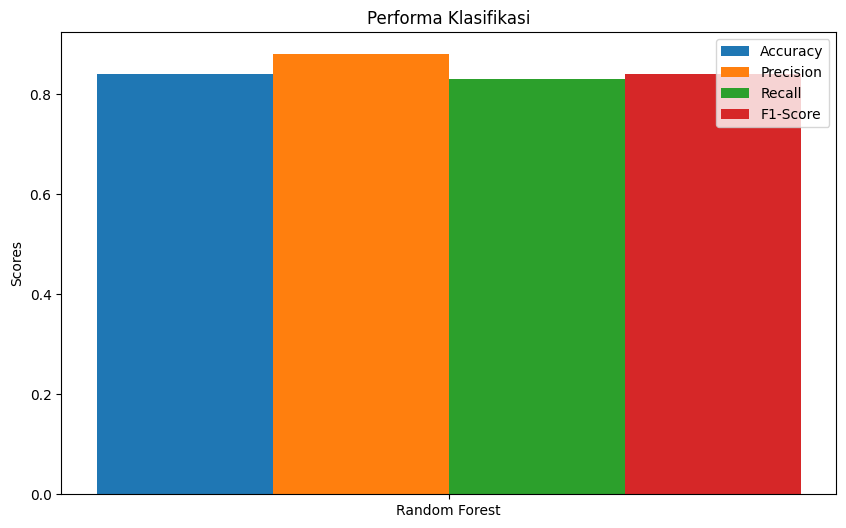

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data performa
accuracy = [0.84]
precision = [0.88]
recall = [0.83]
f1_score = [0.84]

# Nama metode klasifikasi
methods = ["Random Forest"]

# Mengatur posisi grup pada sumbu x
x = np.arange(len(methods))

# Lebar bar
bar_width = 0.2

# Membuat grafik
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - 1.5*bar_width, accuracy, bar_width, label='Accuracy')
bar2 = ax.bar(x - 0.5*bar_width, precision, bar_width, label='Precision')
bar3 = ax.bar(x + 0.5*bar_width, recall, bar_width, label='Recall')
bar4 = ax.bar(x + 1.5*bar_width, f1_score, bar_width, label='F1-Score')

# Label pada sumbu x
ax.set_xticks(x)
ax.set_xticklabels(methods)

# Menambahkan label pada sumbu y
ax.set_ylabel('Scores')

# Menambahkan judul
ax.set_title('Performa Klasifikasi')

# Menambahkan legenda
ax.legend()

# Menampilkan grafik
plt.show()


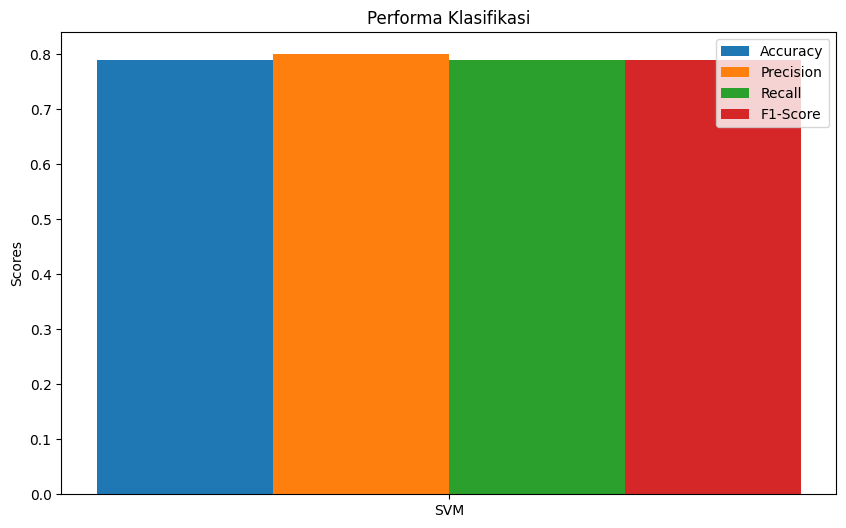

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data performa
accuracy = [0.79]
precision = [0.80]
recall = [0.79]
f1_score = [0.79]

# Nama metode klasifikasi
methods = ["SVM"]

# Mengatur posisi grup pada sumbu x
x = np.arange(len(methods))

# Lebar bar
bar_width = 0.2

# Membuat grafik
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - 1.5*bar_width, accuracy, bar_width, label='Accuracy')
bar2 = ax.bar(x - 0.5*bar_width, precision, bar_width, label='Precision')
bar3 = ax.bar(x + 0.5*bar_width, recall, bar_width, label='Recall')
bar4 = ax.bar(x + 1.5*bar_width, f1_score, bar_width, label='F1-Score')

# Label pada sumbu x
ax.set_xticks(x)
ax.set_xticklabels(methods)

# Menambahkan label pada sumbu y
ax.set_ylabel('Scores')

# Menambahkan judul
ax.set_title('Performa Klasifikasi')

# Menambahkan legenda
ax.legend()

# Menampilkan grafik
plt.show()


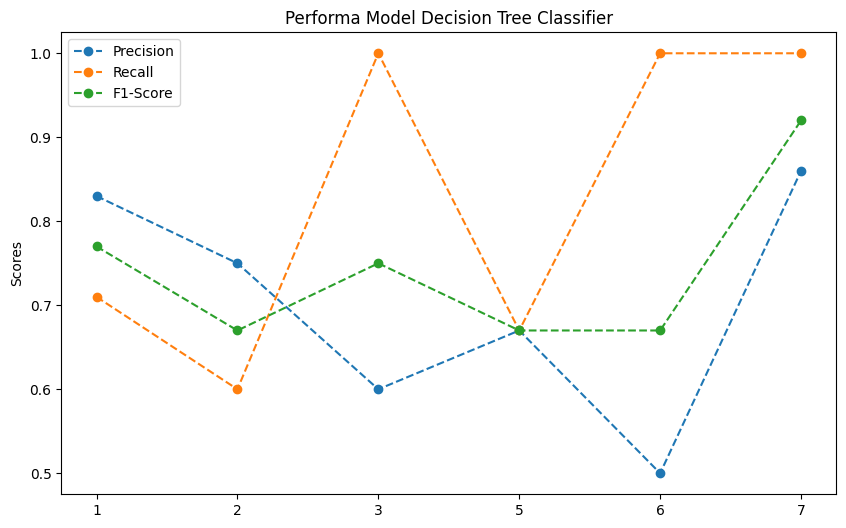

In [ ]:
import matplotlib.pyplot as plt

# Data precision, recall, dan f1-score
precision = [0.83, 0.75, 0.60, 0.67, 0.50, 0.86]
recall = [0.71, 0.60, 1.00, 0.67, 1.00, 1.00]
f1_score = [0.77, 0.67, 0.75, 0.67, 0.67, 0.92]

# Label kelas
labels = ['1', '2', '3', '5', '6', '7']

# Mengatur posisi x
x = range(len(labels))

# Membuat grafik
plt.figure(figsize=(10, 6))
plt.plot(x, precision, linestyle='--', marker='o', label='Precision')
plt.plot(x, recall, linestyle='--', marker='o', label='Recall')
plt.plot(x, f1_score, linestyle='--', marker='o', label='F1-Score')

# Menambahkan label pada sumbu x
plt.xticks(x, labels)

# Menambahkan label pada sumbu y
plt.ylabel('Scores')

# Menambahkan judul
plt.title('Performa Model Decision Tree Classifier')

# Menambahkan legend
plt.legend()

# Menampilkan grafik
plt.show()


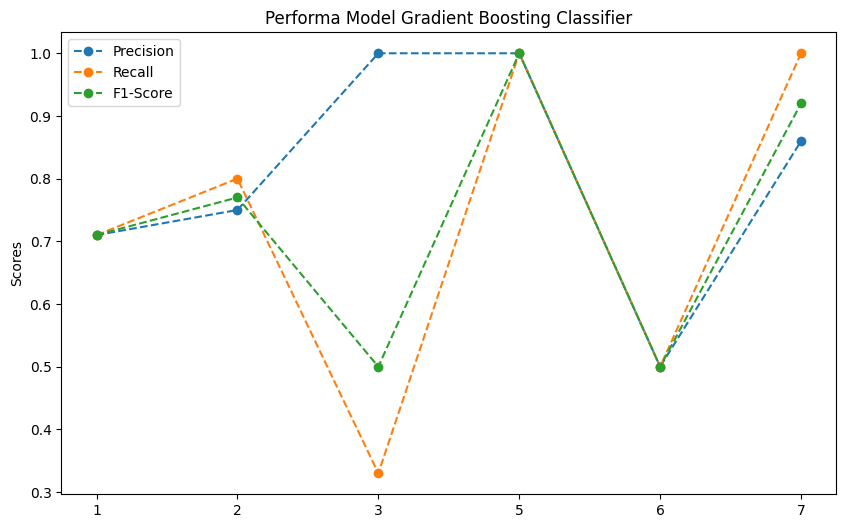

In [ ]:
import matplotlib.pyplot as plt

# Data precision, recall, dan f1-score
precision = [0.71, 0.75, 1.00, 1.00, 0.50, 0.86]
recall = [0.71, 0.80, 0.33, 1.00, 0.50, 1.00]
f1_score = [0.71, 0.77, 0.50, 1.00, 0.50, 0.92]

# Label kelas
labels = ['1', '2', '3', '5', '6', '7']

# Mengatur posisi x
x = range(len(labels))

# Membuat grafik
plt.figure(figsize=(10, 6))
plt.plot(x, precision, linestyle='--', marker='o', label='Precision')
plt.plot(x, recall, linestyle='--', marker='o', label='Recall')
plt.plot(x, f1_score, linestyle='--', marker='o', label='F1-Score')

# Menambahkan label pada sumbu x
plt.xticks(x, labels)

# Menambahkan label pada sumbu y
plt.ylabel('Scores')

# Menambahkan judul
plt.title('Performa Model Gradient Boosting Classifier')

# Menambahkan legend
plt.legend()

# Menampilkan grafik
plt.show()


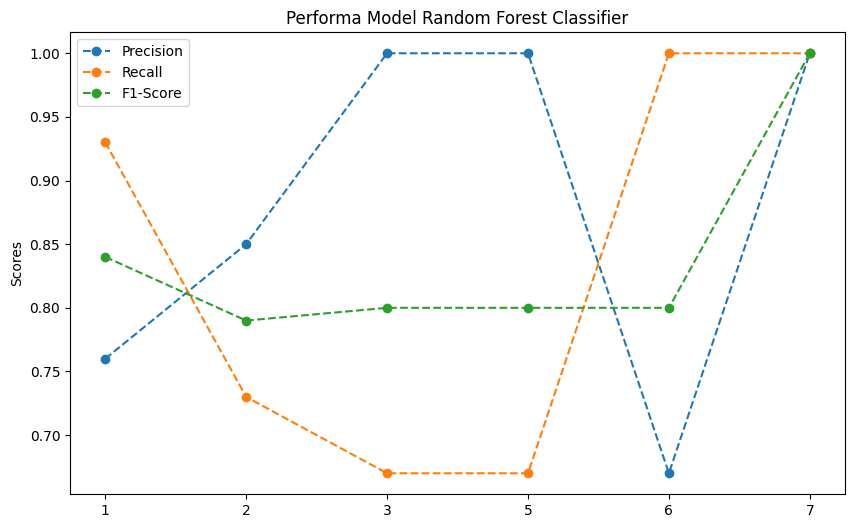

In [ ]:
import matplotlib.pyplot as plt

# Data precision, recall, dan f1-score
precision = [0.76, 0.85, 1.00, 1.00, 0.67, 1.00]
recall = [0.93, 0.73, 0.67, 0.67, 1.00, 1.00]
f1_score = [0.84, 0.79, 0.80, 0.80, 0.80, 1.00]

# Label kelas
labels = ['1', '2', '3', '5', '6', '7']

# Mengatur posisi x
x = range(len(labels))

# Membuat grafik
plt.figure(figsize=(10, 6))
plt.plot(x, precision, linestyle='--', marker='o', label='Precision')
plt.plot(x, recall, linestyle='--', marker='o', label='Recall')
plt.plot(x, f1_score, linestyle='--', marker='o', label='F1-Score')

# Menambahkan label pada sumbu x
plt.xticks(x, labels)

# Menambahkan label pada sumbu y
plt.ylabel('Scores')

# Menambahkan judul
plt.title('Performa Model Random Forest Classifier')

# Menambahkan legend
plt.legend()

# Menampilkan grafik
plt.show()


Both approaches (Linear Regression and Ridge) yielded almost the same result, R2 score of about 94 % in predicting the RI.